<a href="https://colab.research.google.com/github/Likhi-tech/major-project-sample1/blob/main/lane_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(662, 1056, 3)


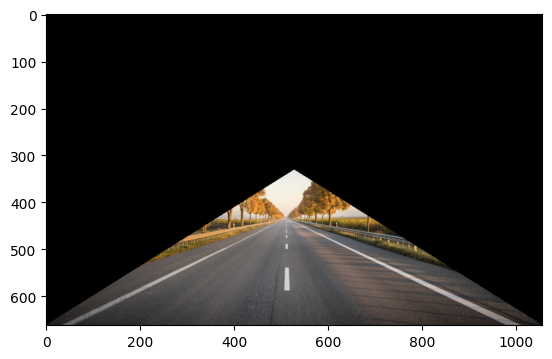

In [31]:
import matplotlib.pylab as plt
import cv2
import numpy as np

image = cv2.imread('/content/Road.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image.shape)
height = image.shape[0]
width = image.shape[1]

region_of_interest_vertices = [
    (0, height),
    (width/2, height/2),
    (width, height)
]

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    channel_count = img.shape[2]
    match_mask_color = (255,) * channel_count
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

cropped_image = region_of_interest(image,
                np.array([region_of_interest_vertices], np.int32),)

plt.imshow(cropped_image)
plt.show()

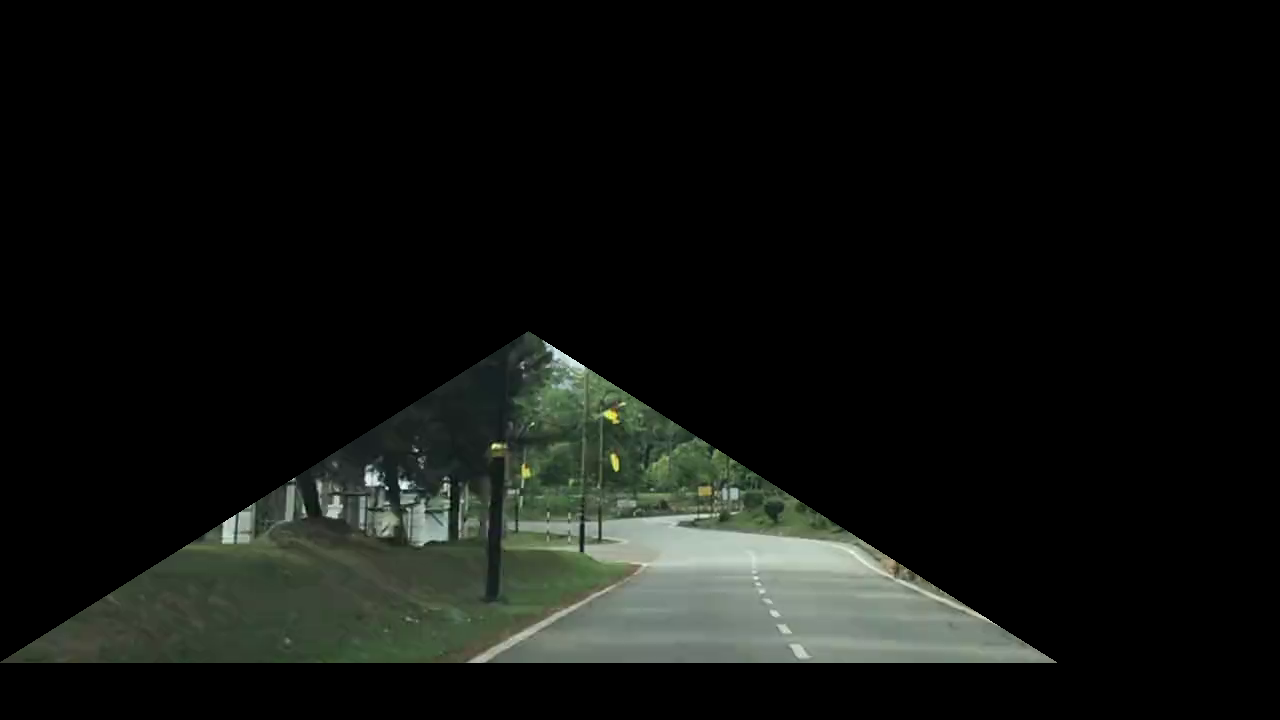

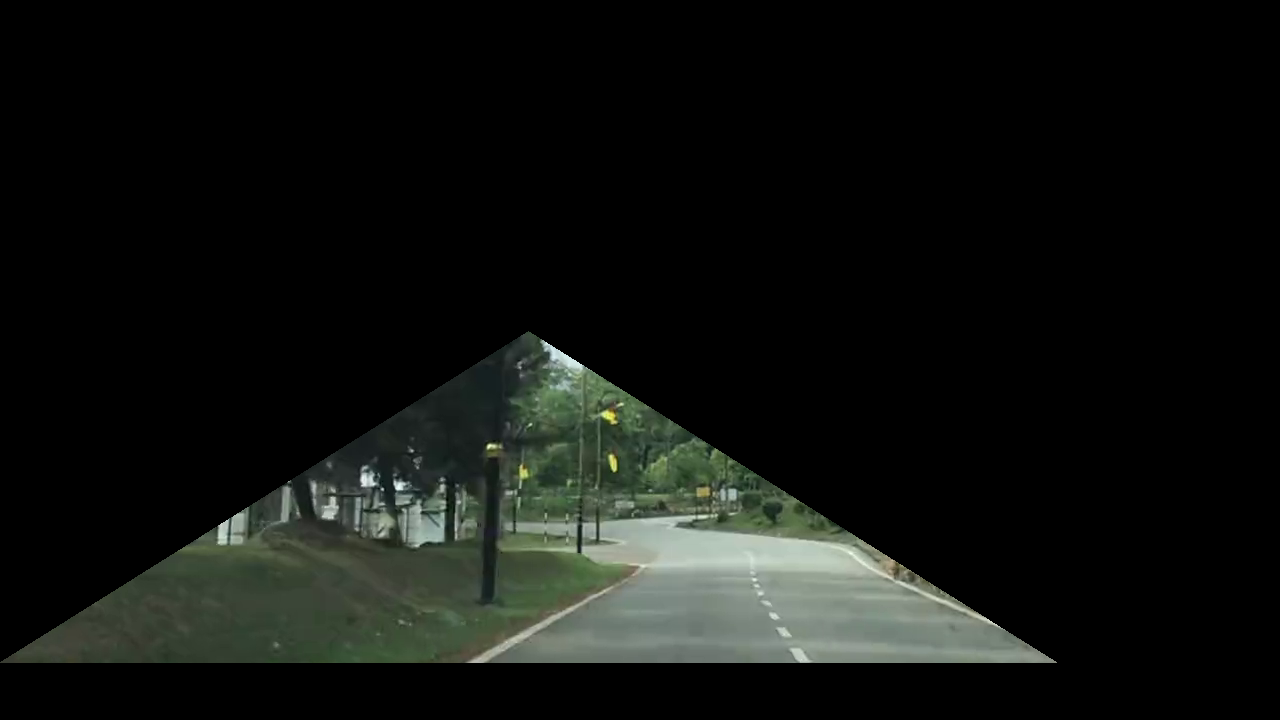

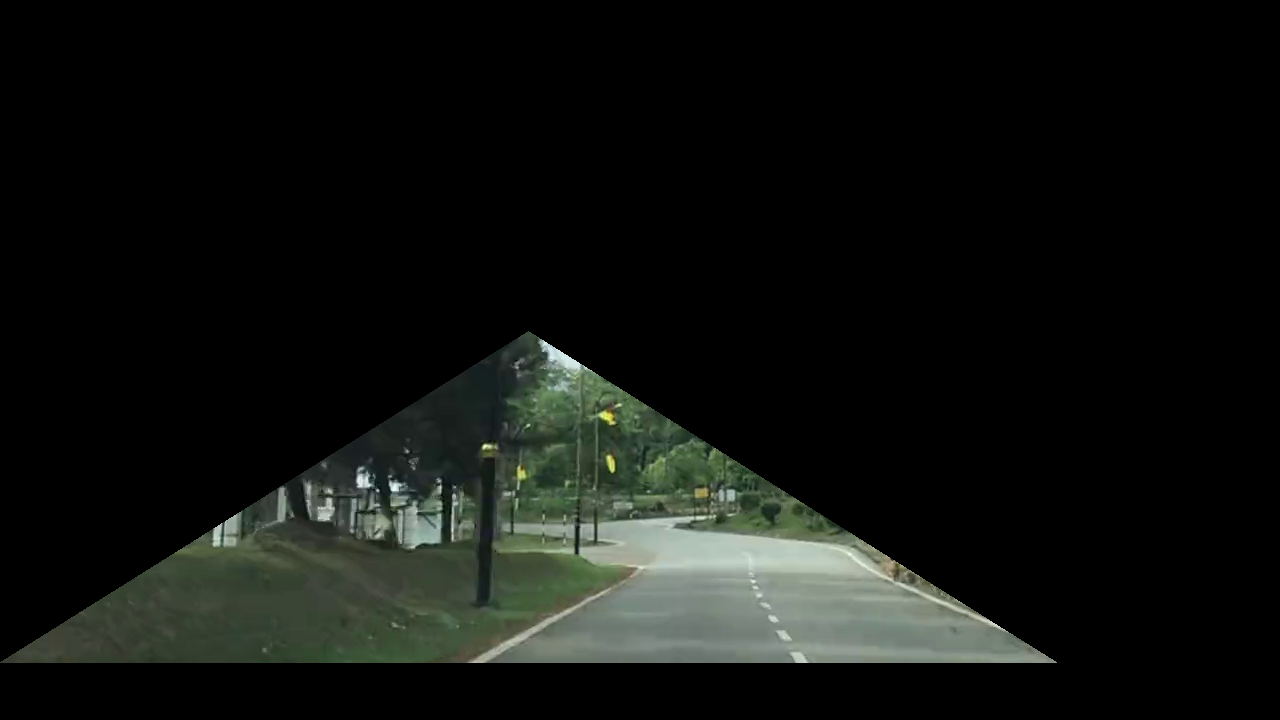

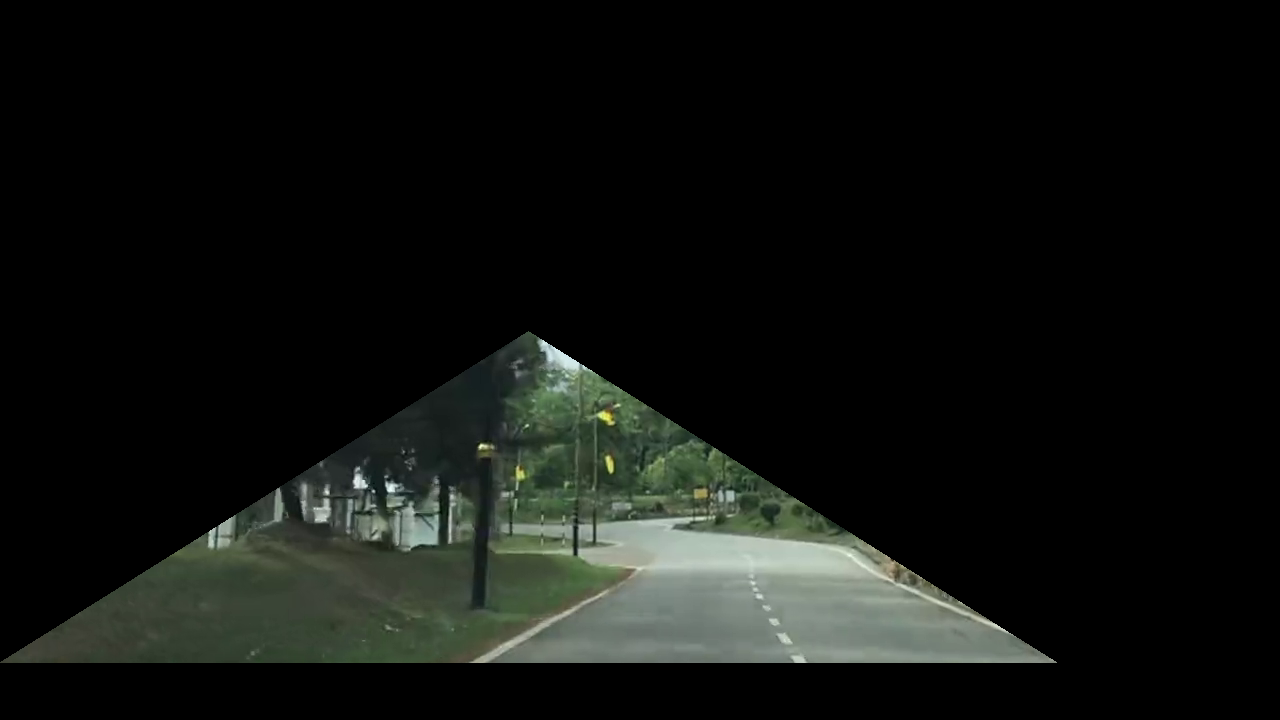

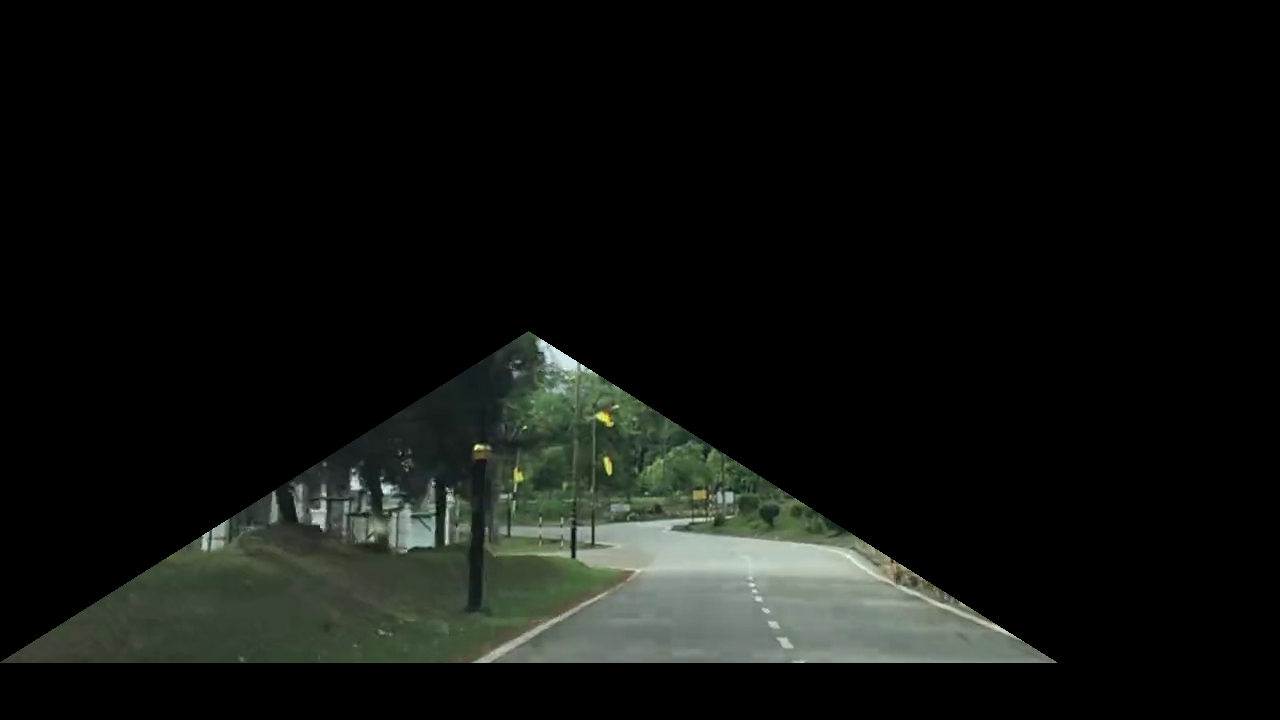

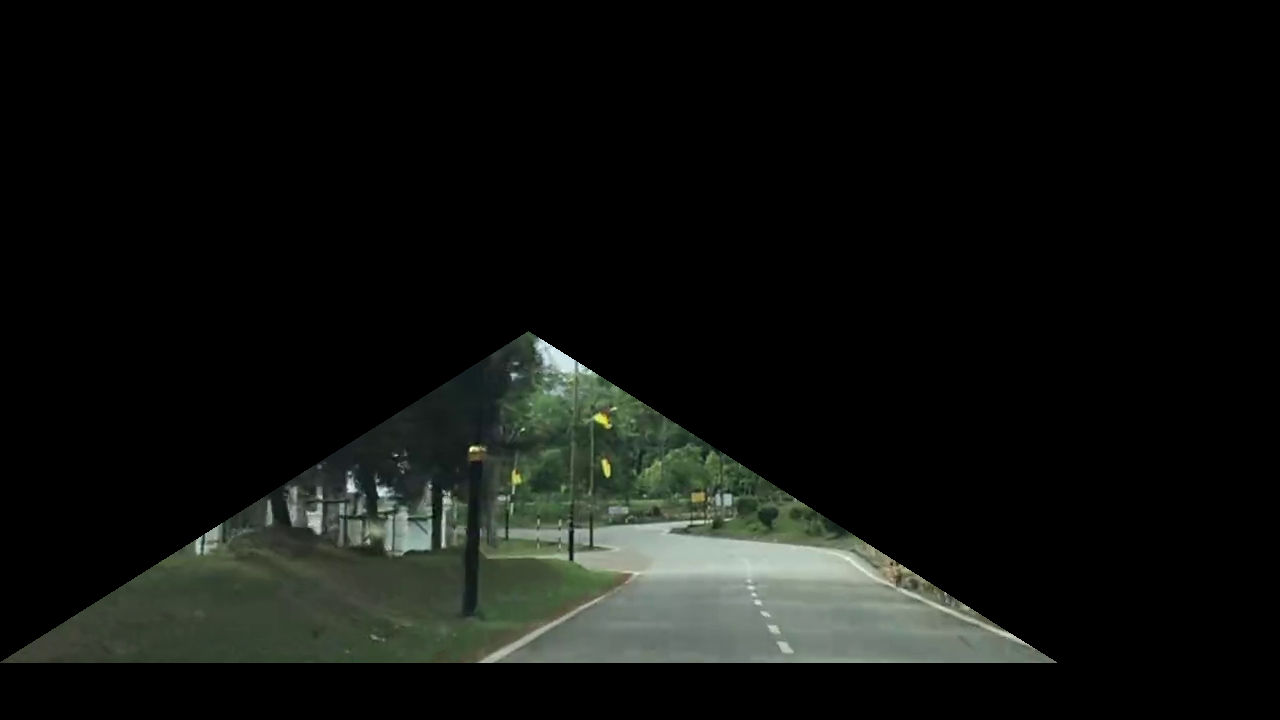

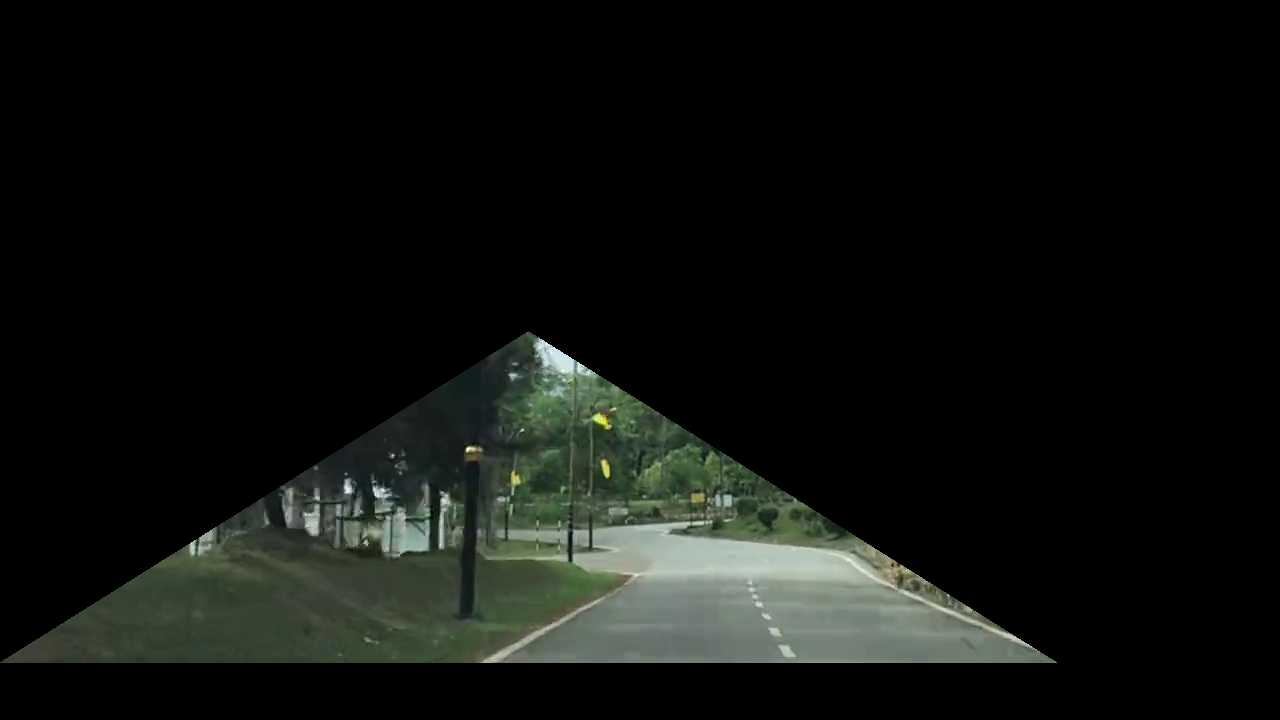

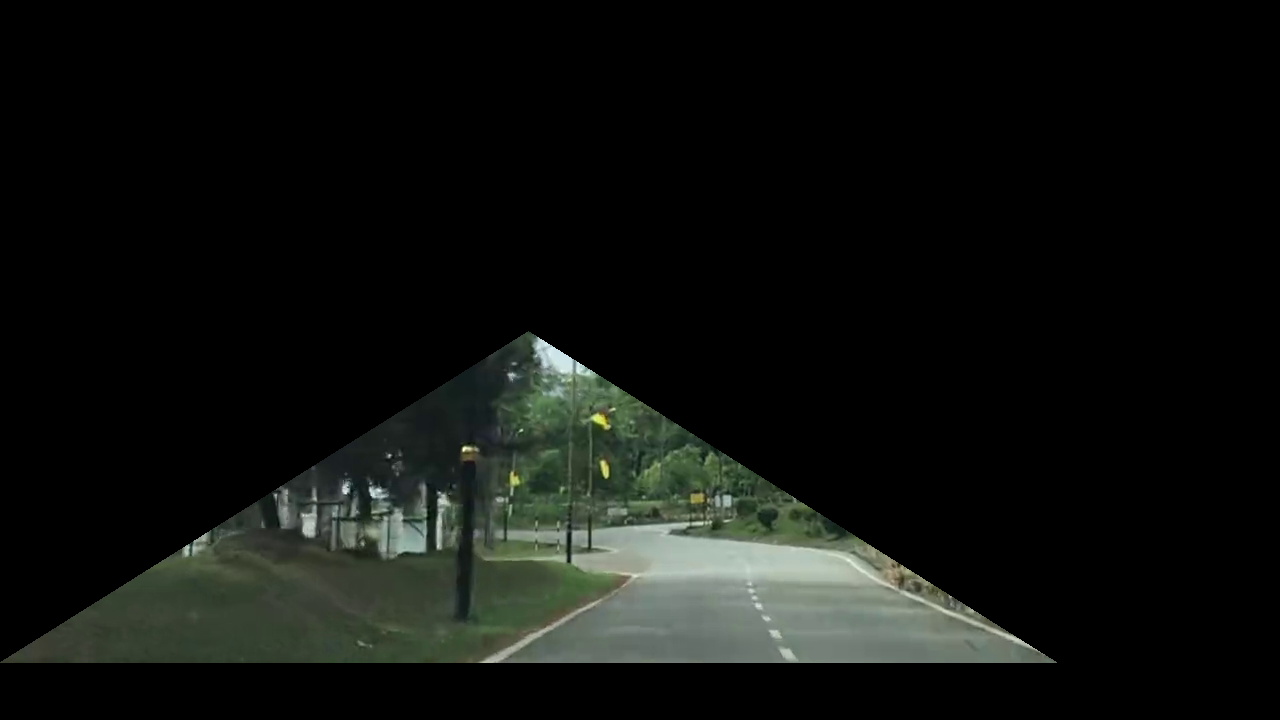

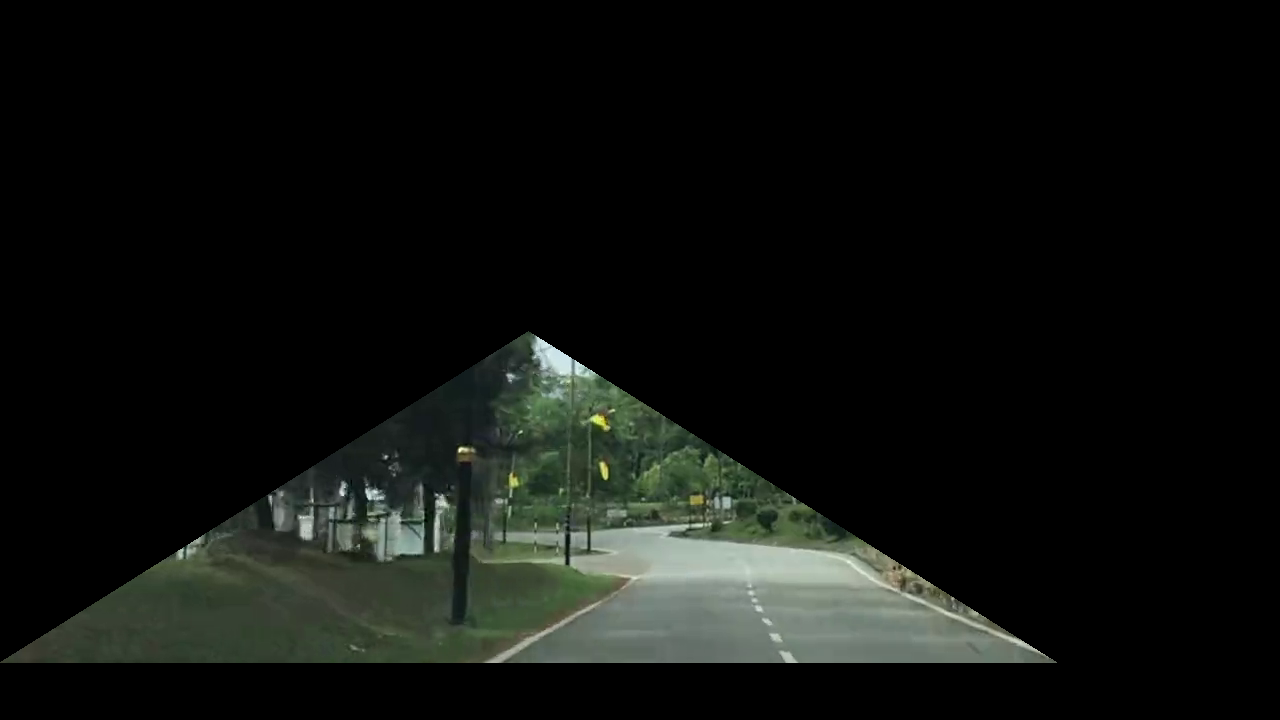

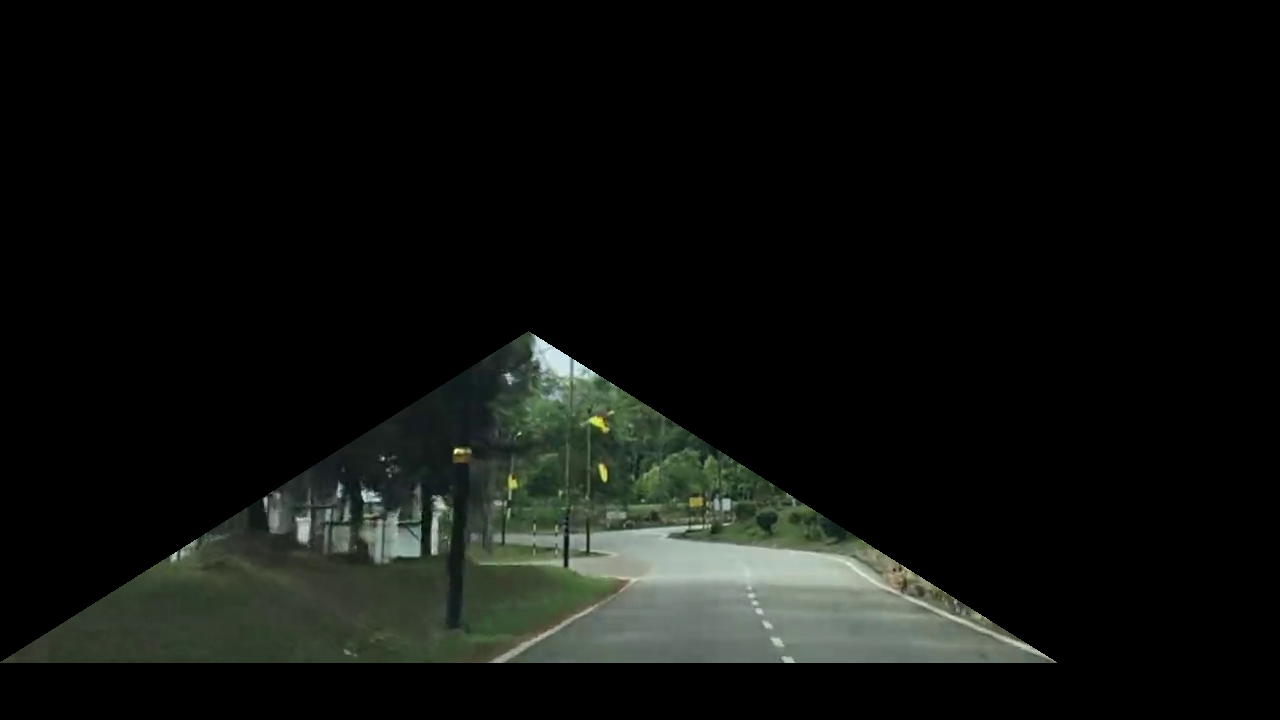

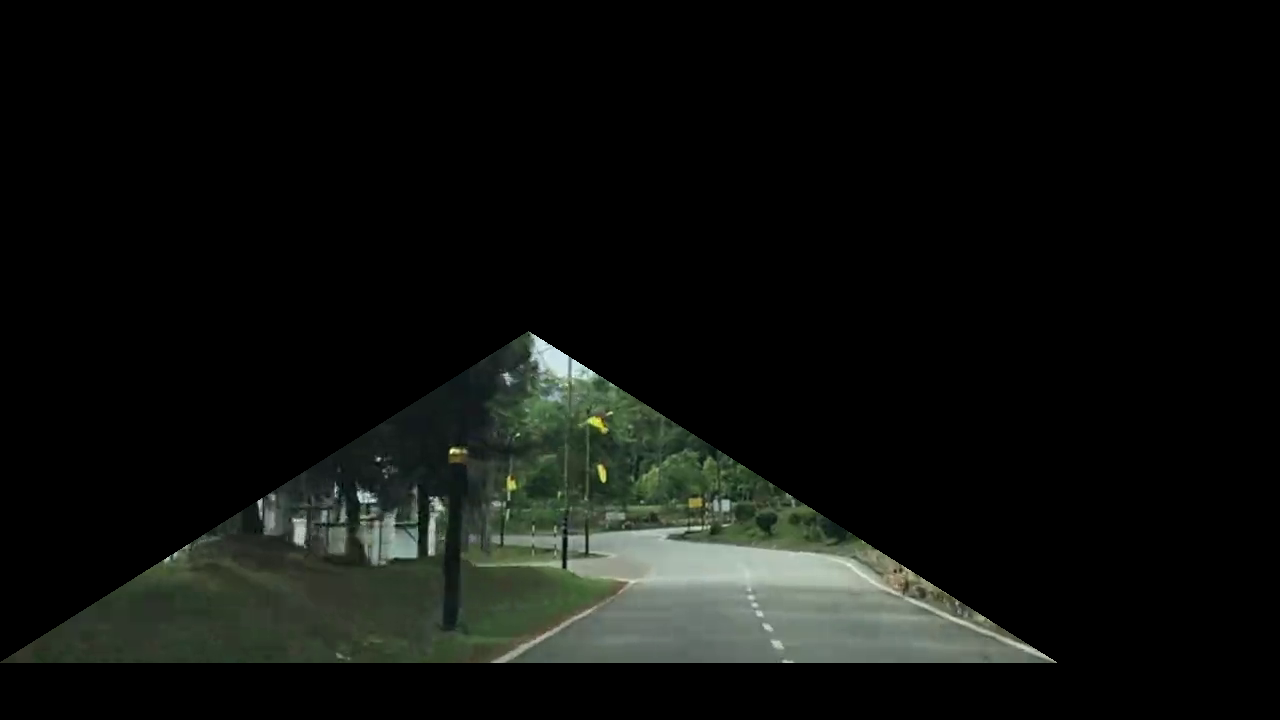

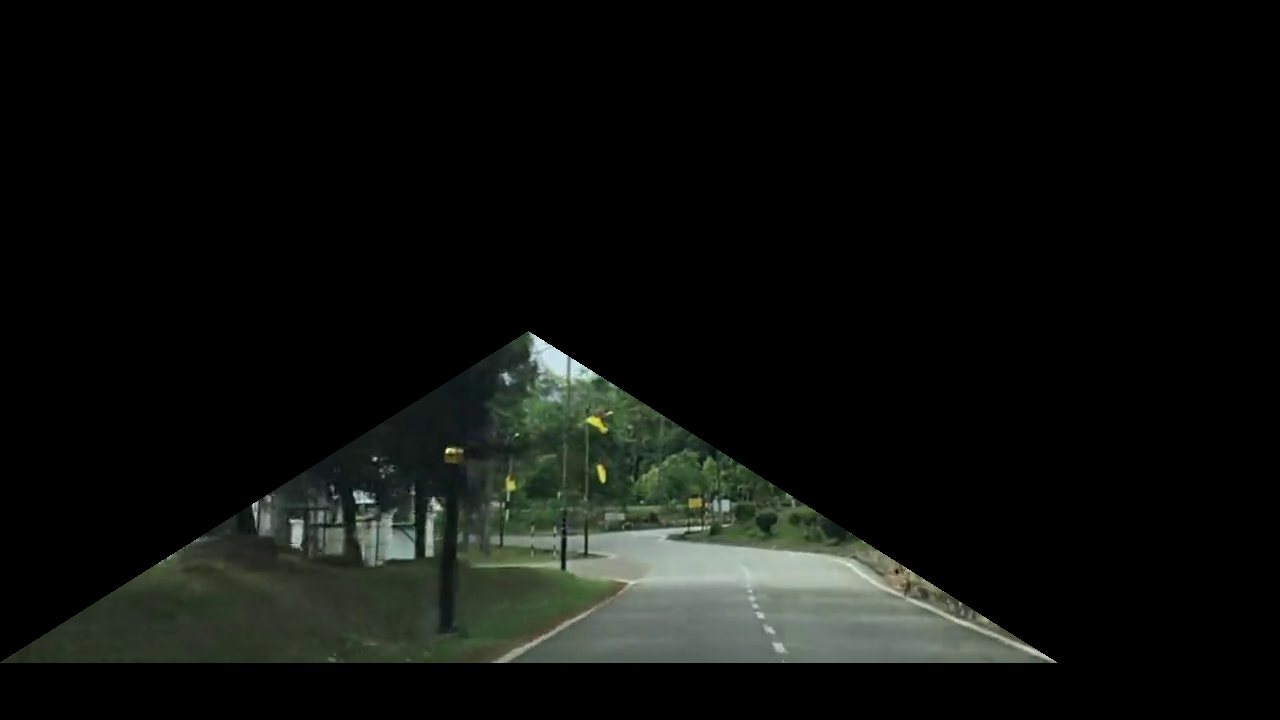

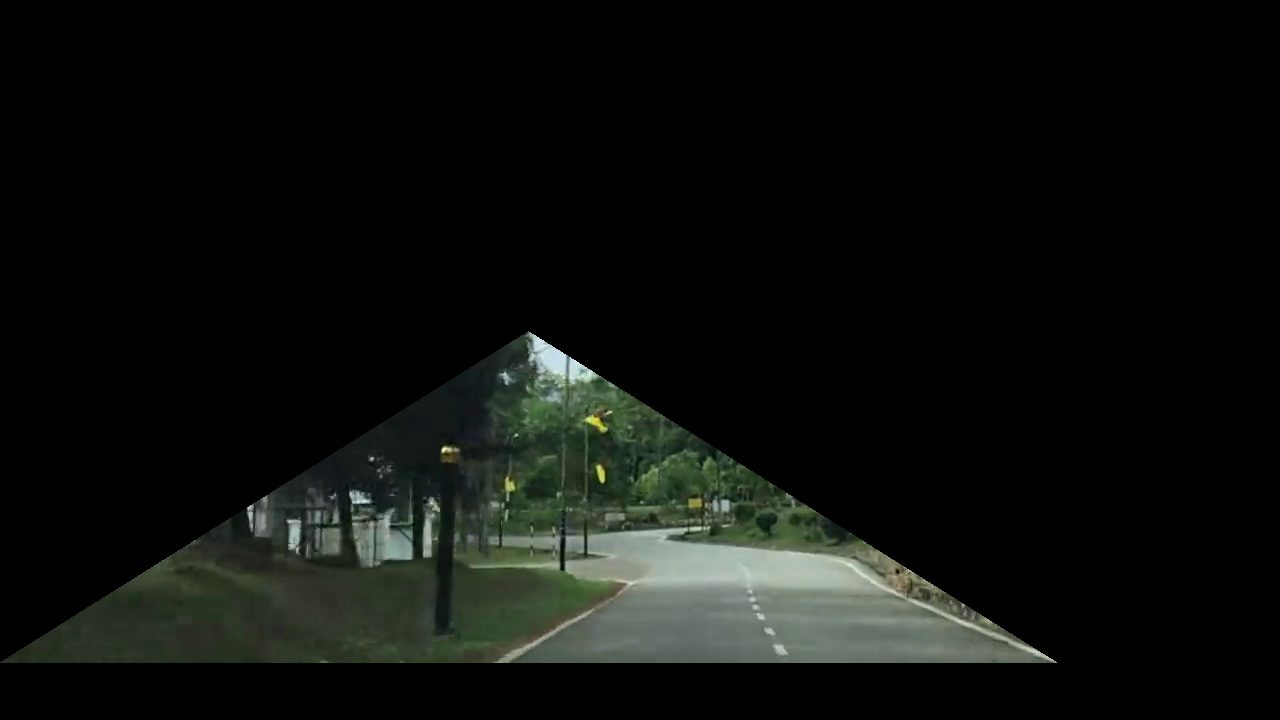

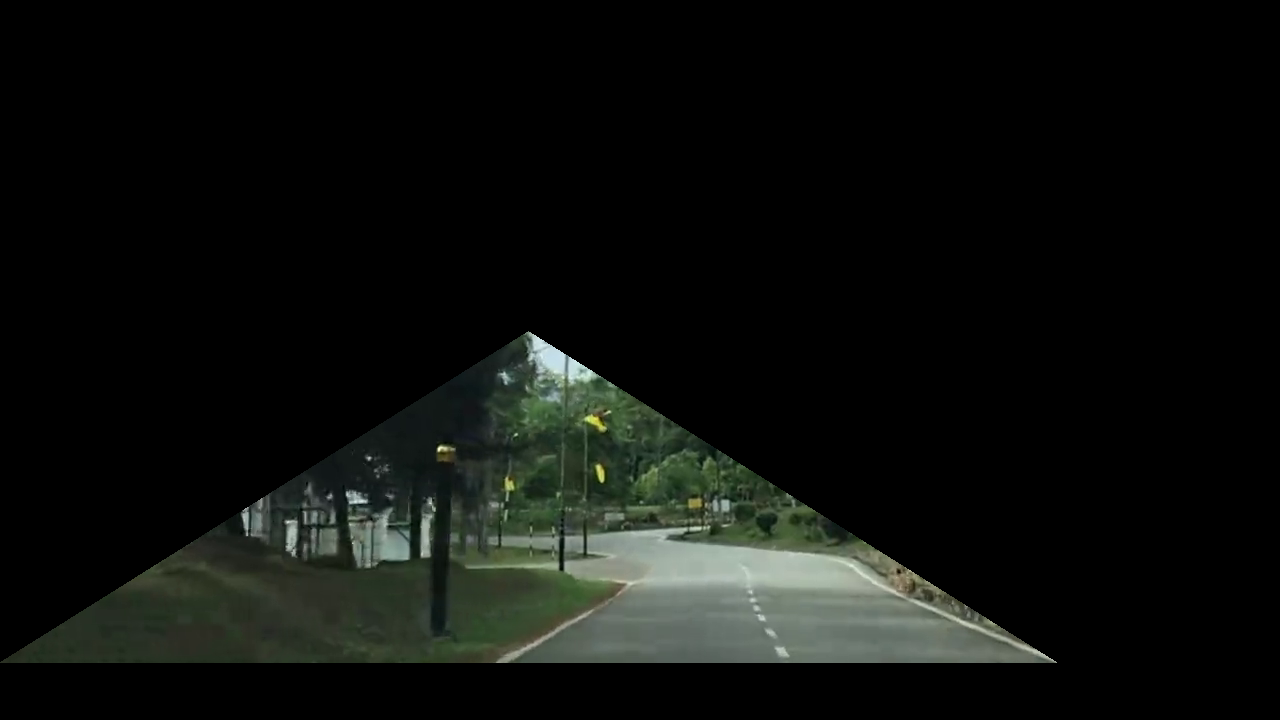

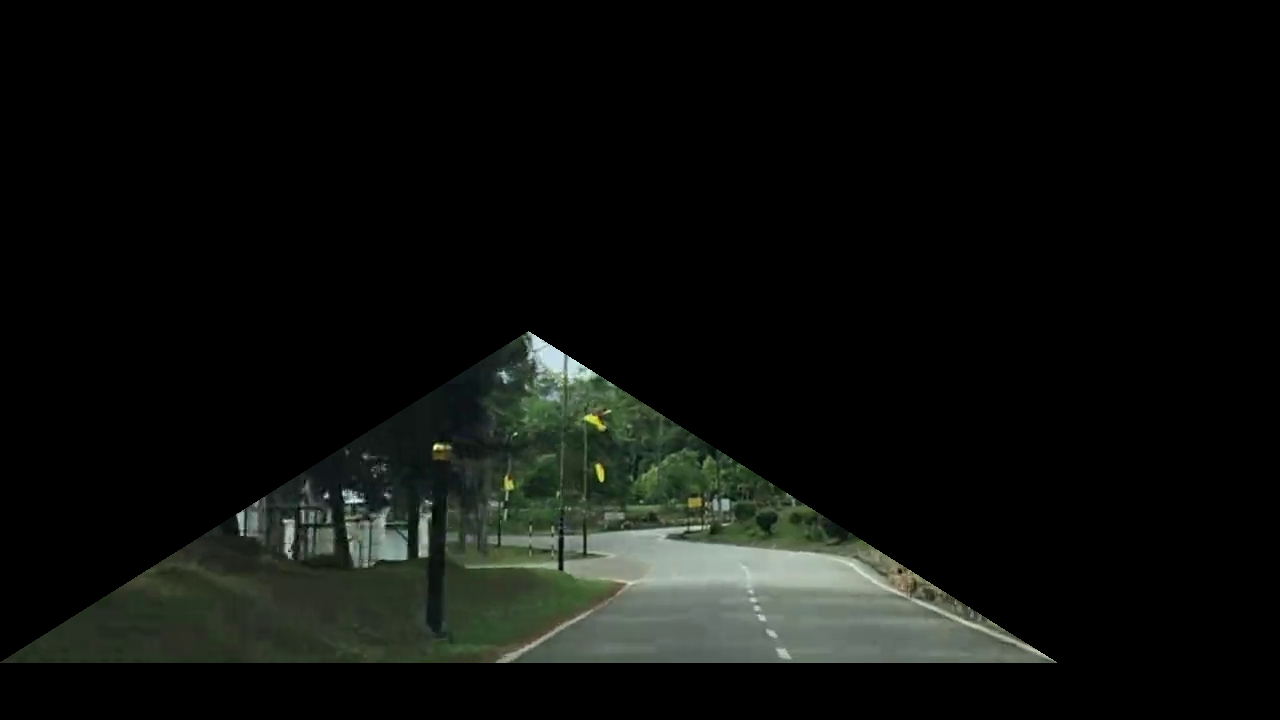

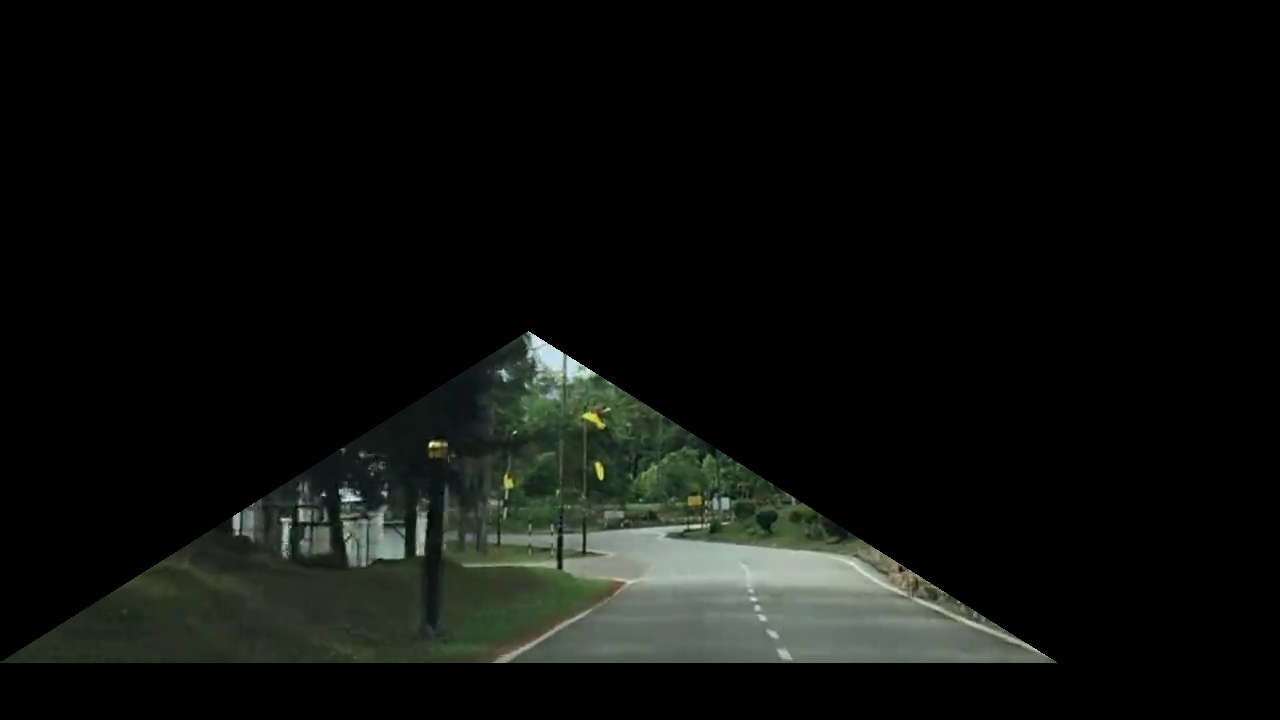

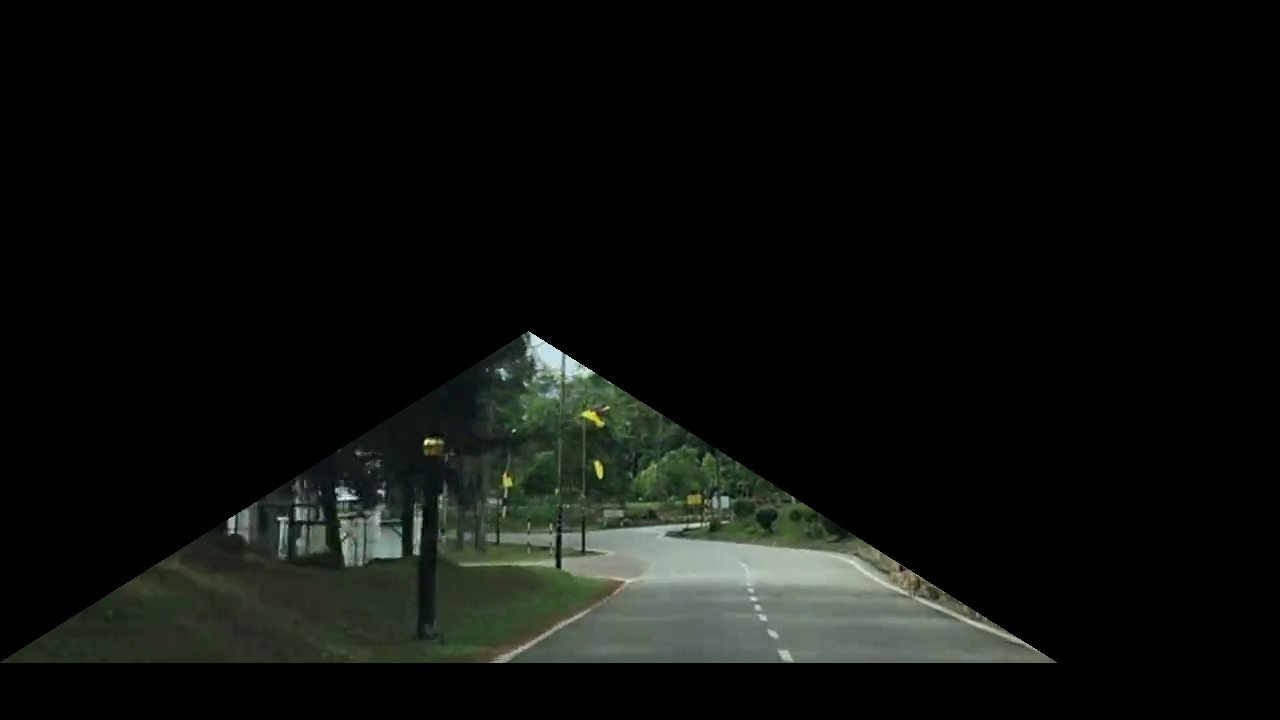

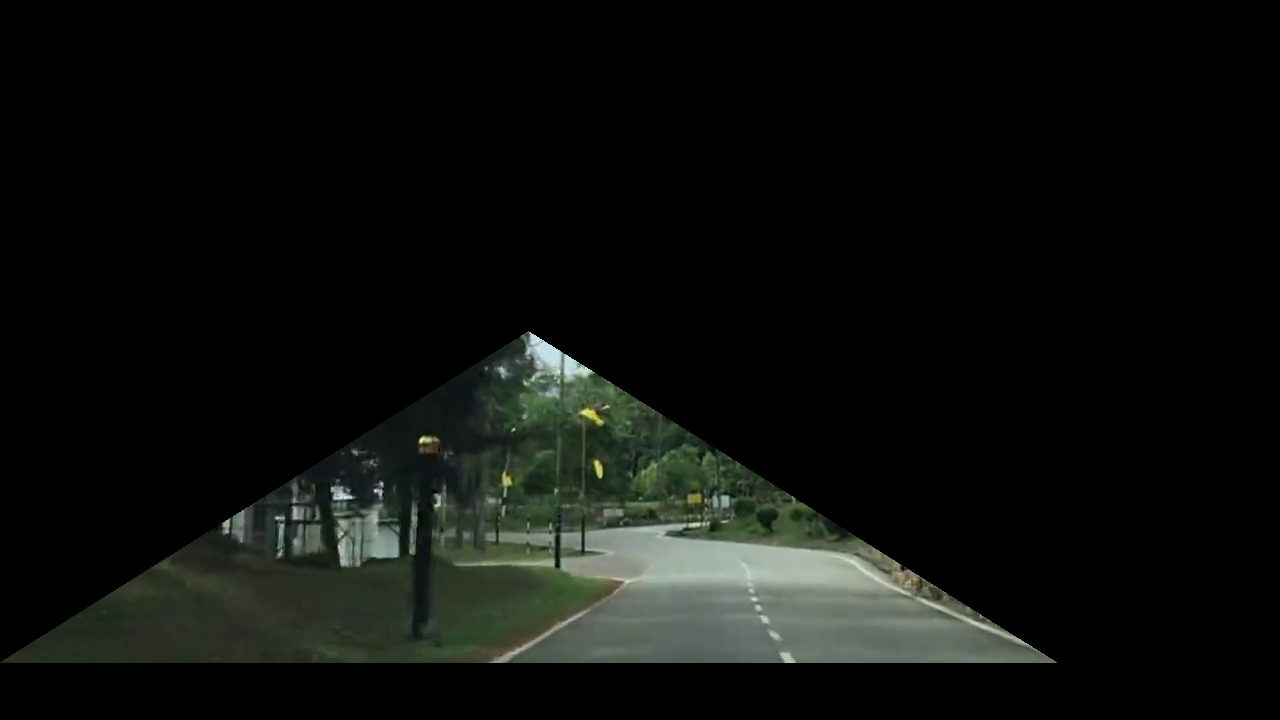

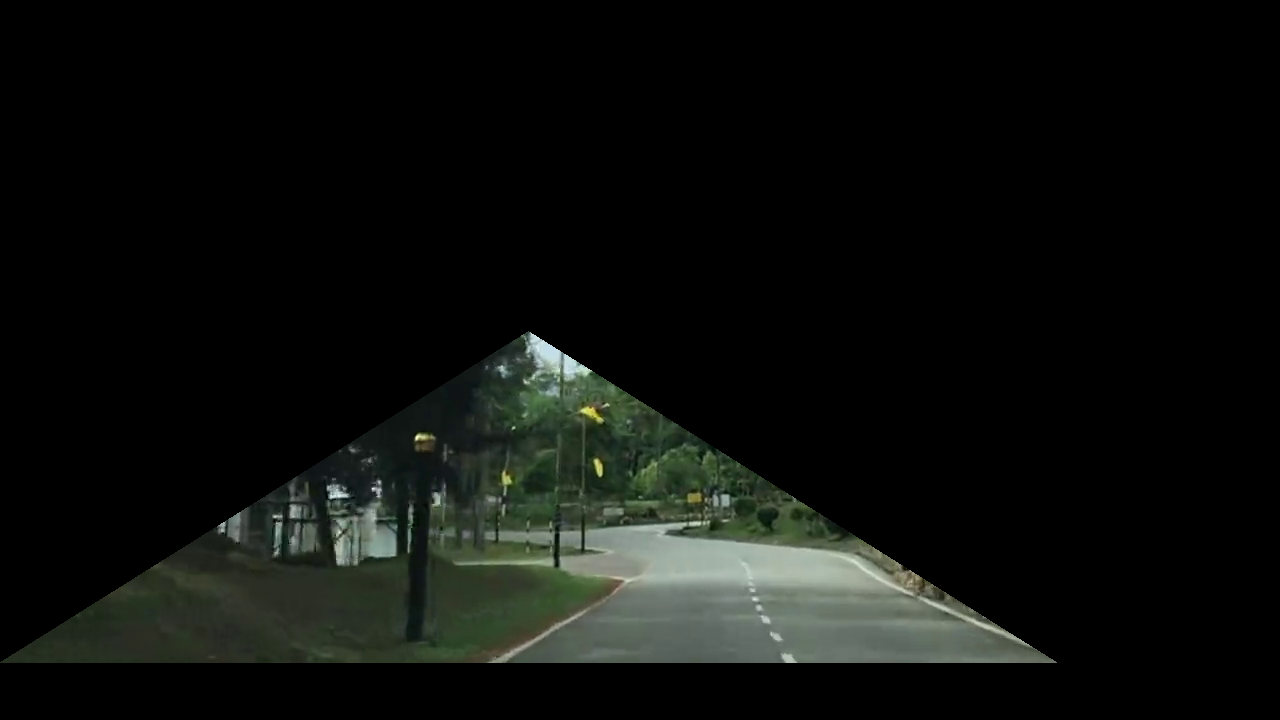

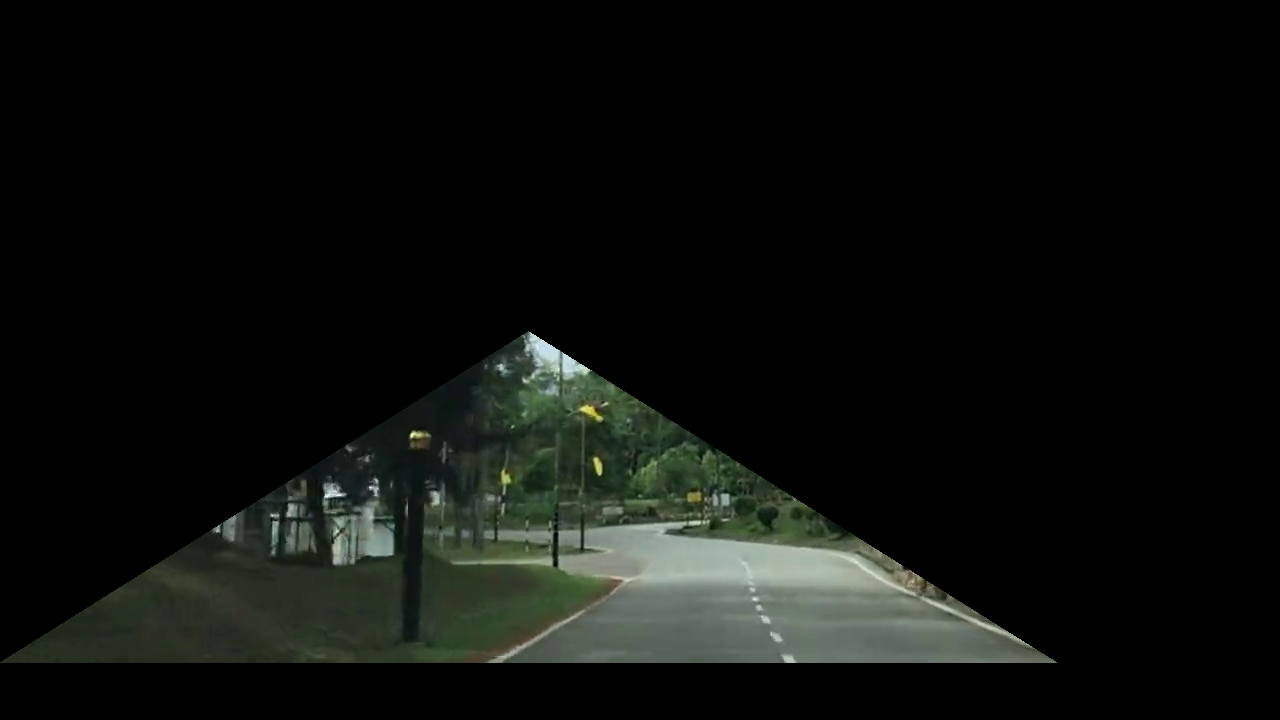

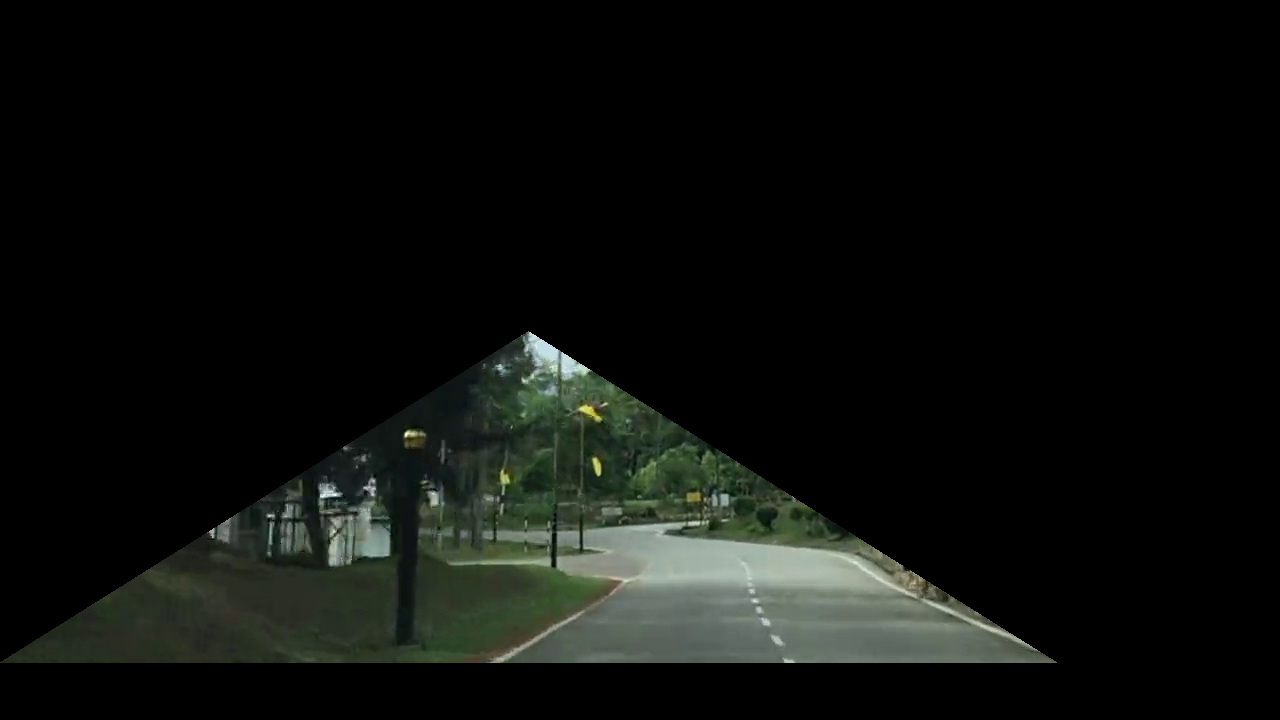

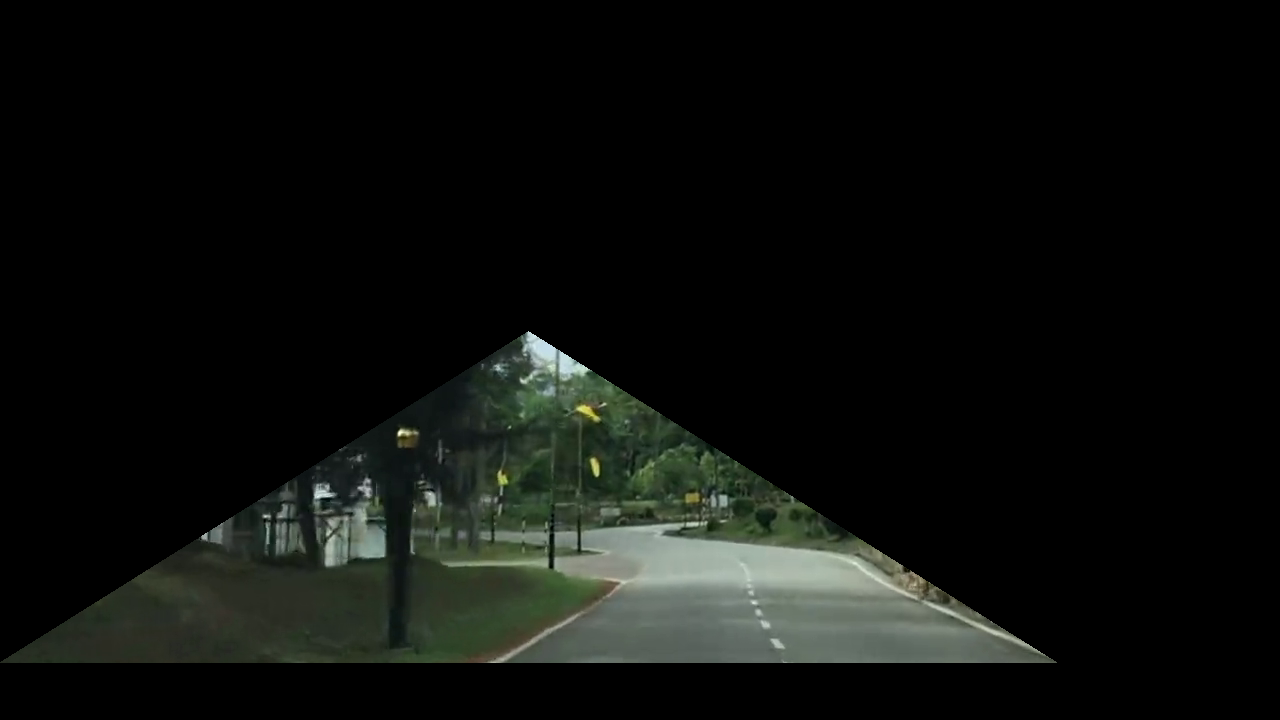

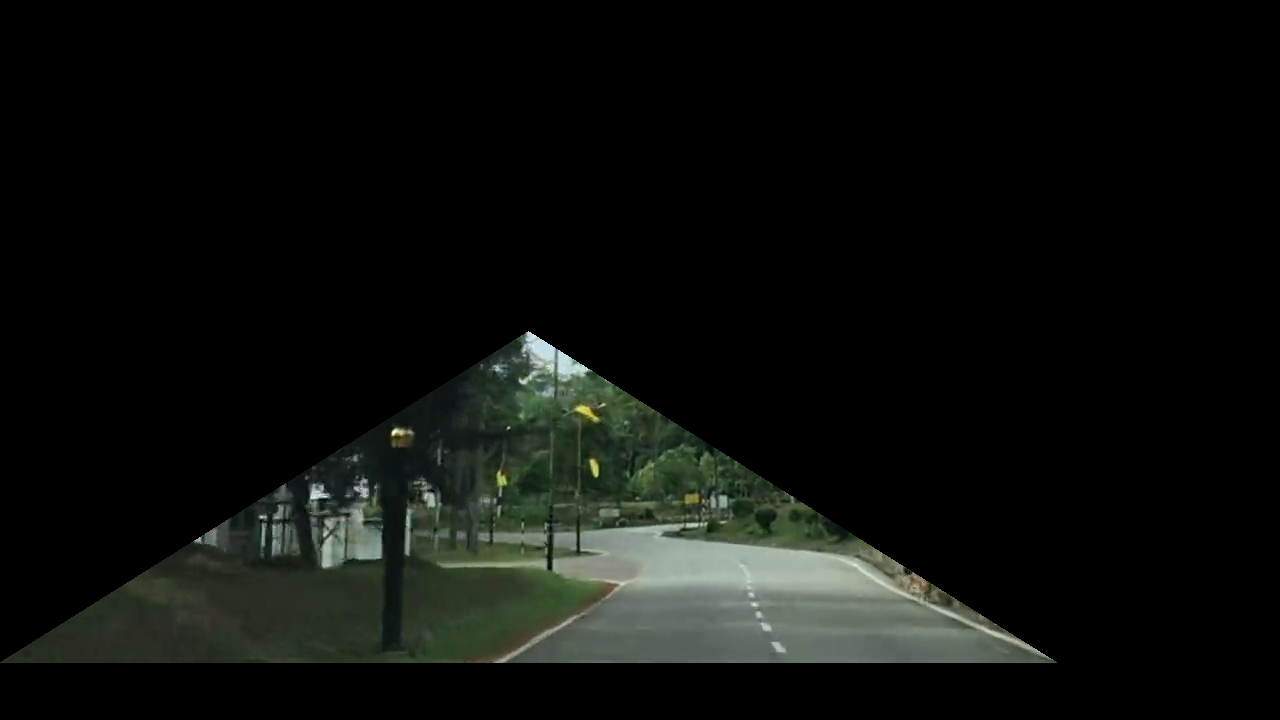

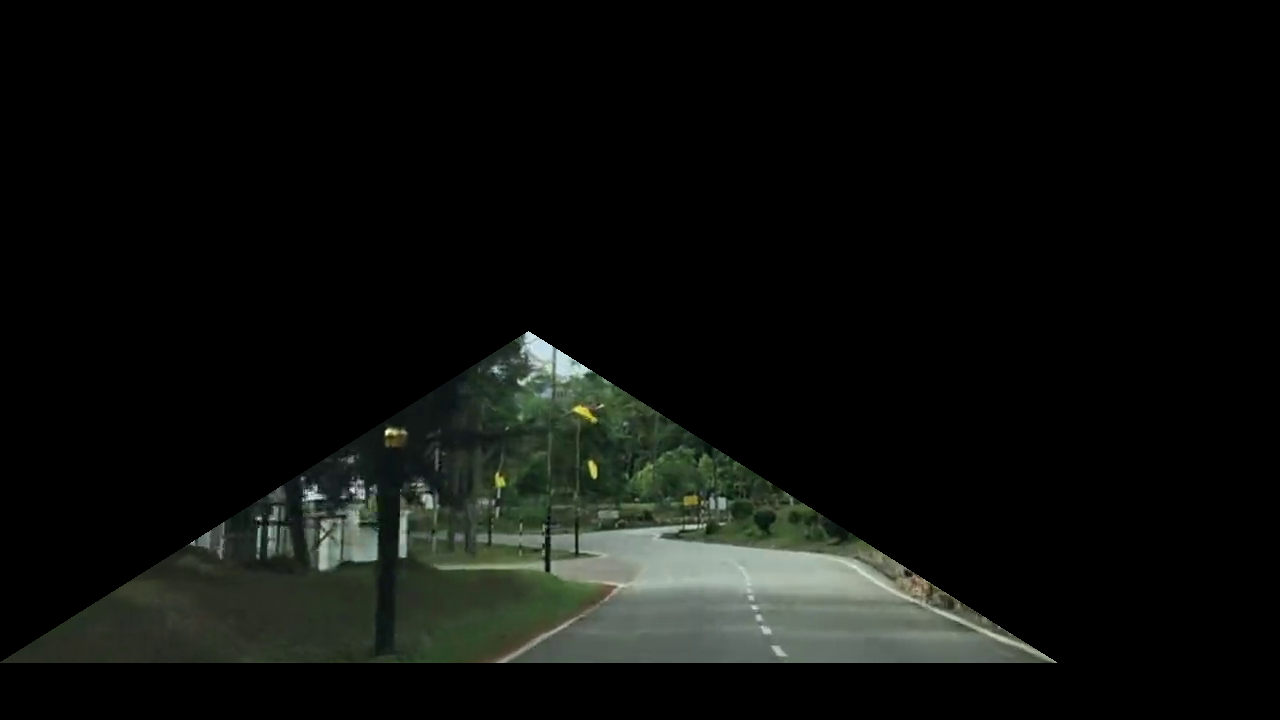

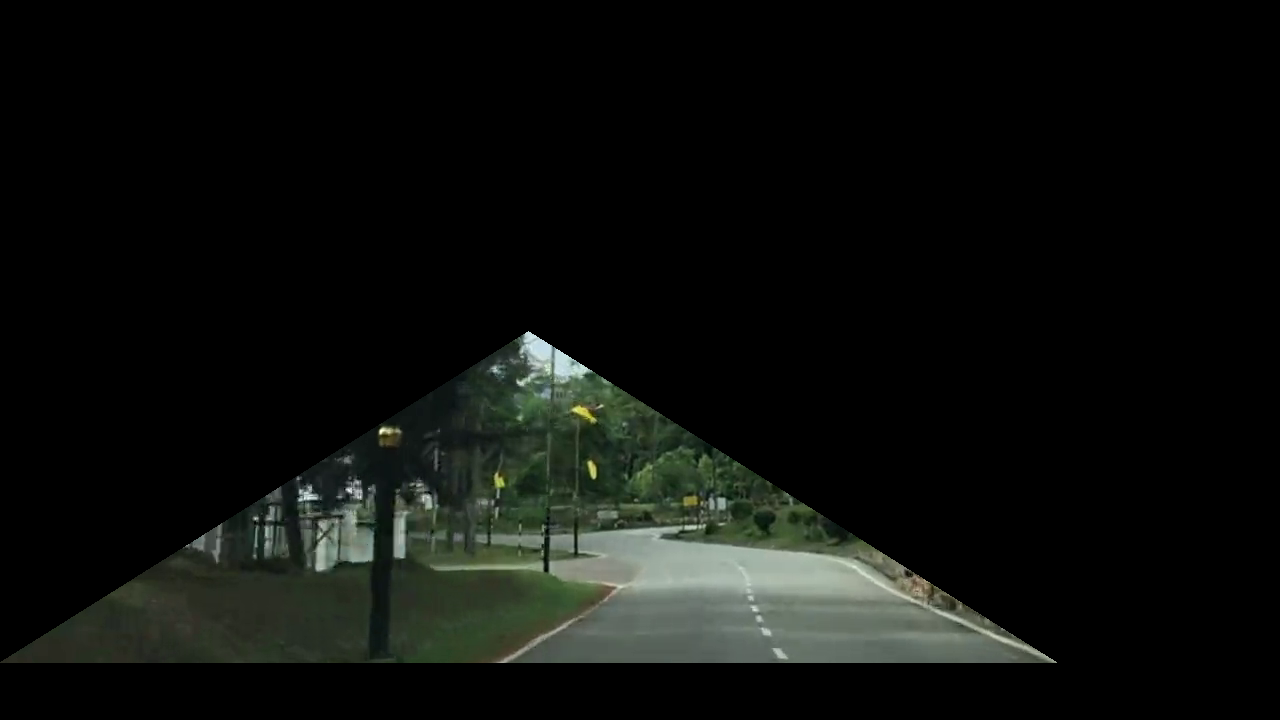

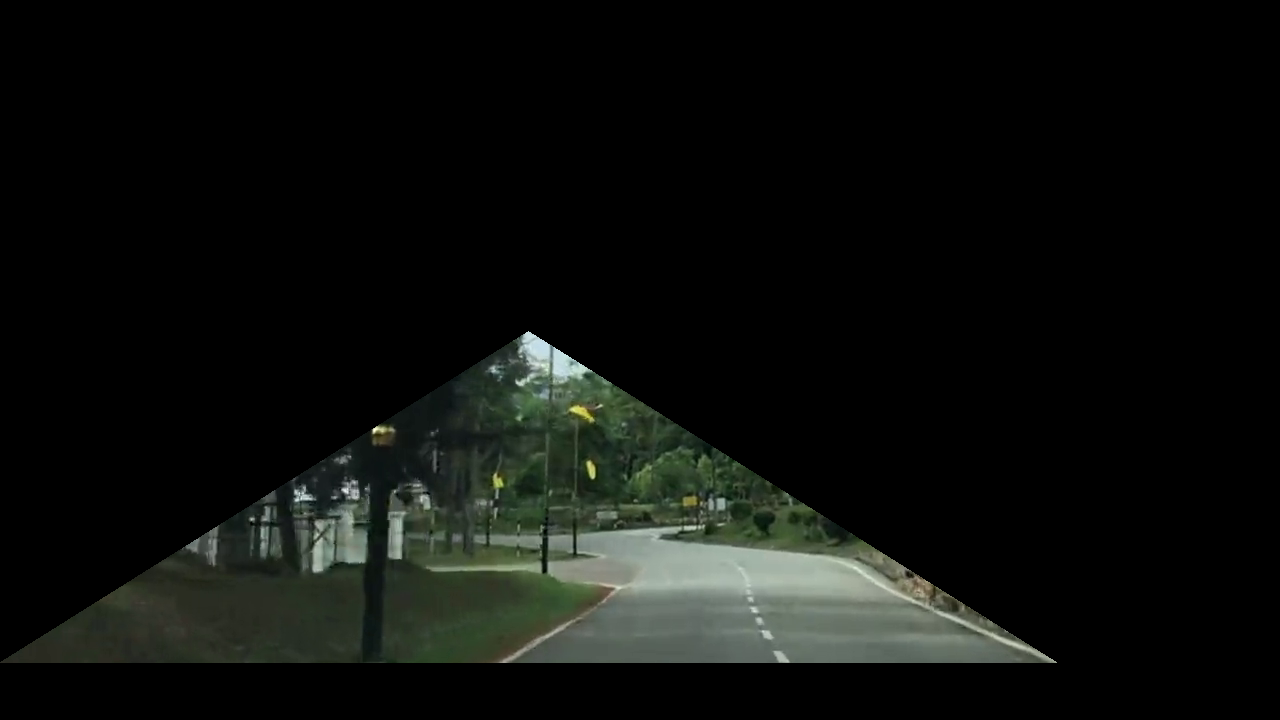

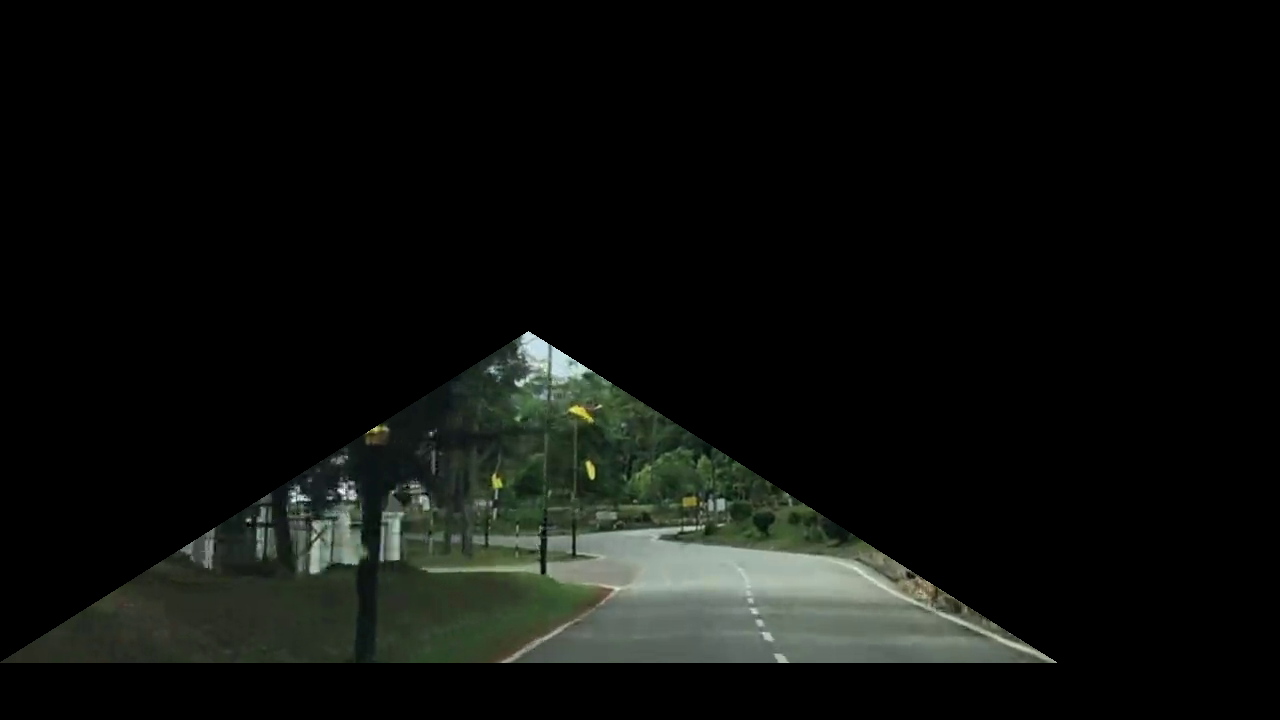

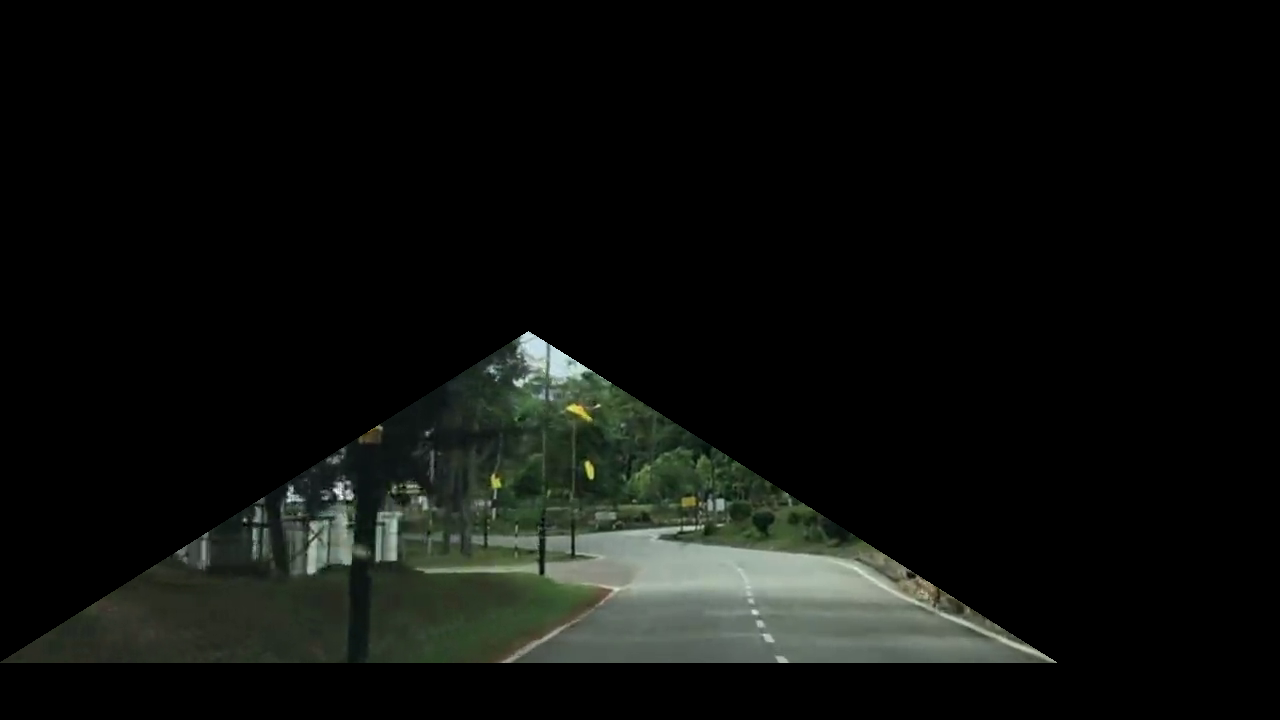

In [ ]:
!pip install opencv-python-headless

import cv2
from google.colab.patches import cv2_imshow # Import cv2_imshow

video_capture = cv2.VideoCapture('/content/road_video.mp4')

while True:
    ret, frame = video_capture.read()
    if not ret:
        break

    processed_frame = region_of_interest(frame, np.array([region_of_interest_vertices], np.int32))

    cv2_imshow(processed_frame) # Use cv2_imshow instead of cv2.imshow

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()